<a href="https://colab.research.google.com/github/noranehab15/projects/blob/main/WTPM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/wind_turbine_maintenance_test_data 2.csv")

In [3]:
df

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1,16.329212,7.229967,1468.371964,60.045948,69.645919,1.712257,12.822084,62.957219,2
1,1,14.109988,8.943831,1793.460409,58.544454,74.709346,2.117721,13.991153,40.500486,0
2,1,16.259475,9.562434,1492.022307,57.223514,77.115291,2.075517,18.011540,62.155541,0
3,1,13.420109,6.911183,1514.954999,57.041996,80.484269,1.849384,14.383540,48.726572,0
4,1,16.428984,5.910646,1487.018006,68.157615,72.067310,2.058144,16.320517,62.900348,0
...,...,...,...,...,...,...,...,...,...,...
35035,2,15.231685,8.544027,1474.081728,59.429461,86.728765,1.898006,17.536176,73.837917,2
35036,2,16.685542,9.335016,1608.526939,66.952756,63.934120,2.140266,7.367036,47.710082,0
35037,2,14.401651,6.897022,1441.527128,68.081199,74.737447,2.087410,11.069500,43.053871,0
35038,2,16.090471,6.456765,1439.580708,56.712369,80.935662,1.901987,10.076924,71.909396,0


In [4]:
df.drop(columns=["Turbine_ID","Ambient_Temp_C","Humidity_pct"],inplace=True)

In [5]:
df.columns = df.columns.str.strip()

In [6]:
target_column = "Maintenance_Label"
id_column = "Turbine_ID"

In [7]:
y = df[target_column]

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).flatten(), name=target_column)

In [9]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
rfc=RandomForestClassifier()

In [12]:
rfc = RandomForestClassifier( max_depth=2,random_state=42,class_weight="balanced")

In [13]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [14]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [17]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2 ],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
}

In [18]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [19]:
best_rfc = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [20]:
best_rfc.fit(X_train, y_train)
y_pred_test = best_rfc.predict(X_test)
y_pred_train = best_rfc.predict(X_train)

In [21]:
accuracy_rfc = accuracy_score(y_test, y_pred_test)
f1_rfc = f1_score(y_test, y_pred_test, average="weighted")

In [22]:
accuracy_train_rfc = accuracy_score(y_train, y_pred_train)
f1_train_rfc = f1_score(y_train, y_pred_train, average="weighted")

In [23]:
print(f"Test Accuracy: {accuracy_rfc:.4f}, Test F1 Score: {f1_rfc:.4f}")
print(f"Train Accuracy: {accuracy_train_rfc:.4f}, Train F1 Score: {f1_train_rfc:.4f}")

Test Accuracy: 0.8396, Test F1 Score: 0.7664
Train Accuracy: 0.9950, Train F1 Score: 0.9950


In [24]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
[[5884    0    0]
 [ 568    0    0]
 [ 556    0    0]]


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5884
           1       0.00      0.00      0.00       568
           2       0.00      0.00      0.00       556

    accuracy                           0.84      7008
   macro avg       0.28      0.33      0.30      7008
weighted avg       0.70      0.84      0.77      7008



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
feature_importances = rfc.feature_importances_
feature_names = X_train.columns

In [27]:
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

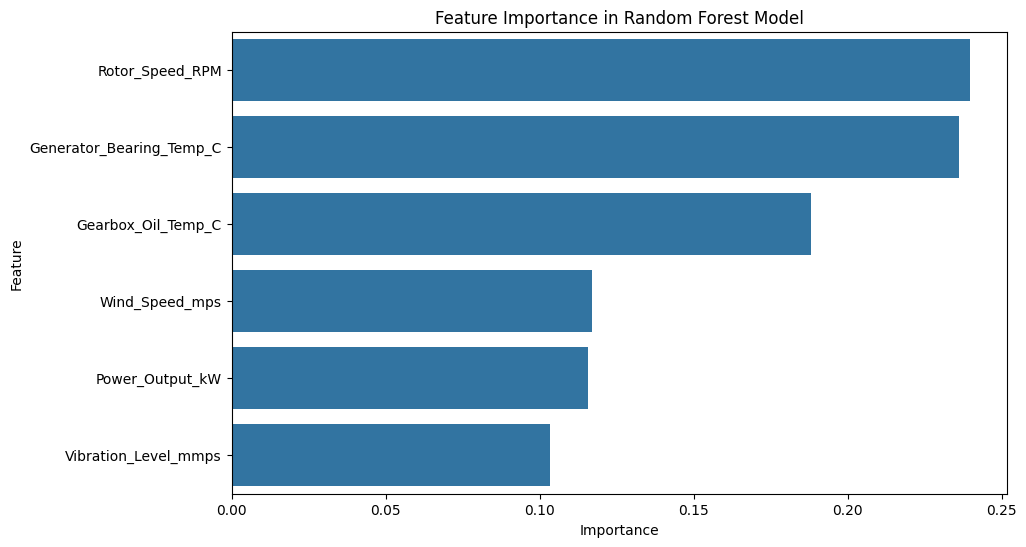

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title("Feature Importance in Random Forest Model")
plt.show()

In [29]:
df2 = pd.read_csv("/content/wind_turbine_maintenance_test_data 2.csv")
df2

,Turbine_ID,Rotor_Speed_RPM,Wind_Speed_mps,Power_Output_kW,Gearbox_Oil_Temp_C,Generator_Bearing_Temp_C,Vibration_Level_mmps,Ambient_Temp_C,Humidity_pct,Maintenance_Label
0,1,16.329212,7.229967,1468.371964,60.045948,69.645919,1.712257,12.822084,62.957219,2
1,1,14.109988,8.943831,1793.460409,58.544454,74.709346,2.117721,13.991153,40.500486,0
2,1,16.259475,9.562434,1492.022307,57.223514,77.115291,2.075517,18.011540,62.155541,0
3,1,13.420109,6.911183,1514.954999,57.041996,80.484269,1.849384,14.383540,48.726572,0
4,1,16.428984,5.910646,1487.018006,68.157615,72.067310,2.058144,16.320517,62.900348,0
...,...,...,...,...,...,...,...,...,...,...
35035,2,15.231685,8.544027,1474.081728,59.429461,86.728765,1.898006,17.536176,73.837917,2
35036,2,16.685542,9.335016,1608.526939,66.952756,63.934120,2.140266,7.367036,47.710082,0
35037,2,14.401651,6.897022,1441.527128,68.081199,74.737447,2.087410,11.069500,43.053871,0
35038,2,16.090471,6.456765,1439.580708,56.712369,80.935662,1.901987,10.076924,71.909396,0


In [30]:
df2['Maintenance_Label'] = df2['Maintenance_Label'].astype('category')

In [41]:
X_actual_test = df2.reindex(columns=X.columns, fill_value=0)
X_actual_test_scaled = scaler.transform(X_actual_test)

In [42]:
y_test_pred = best_rfc.predict(X_actual_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
submission_df = pd.DataFrame({"Maintenance_Label": y_test_pred})
submission_file = "/content/submission.csv"
submission_df.to_csv(submission_file, index=False)
print(f"Submission file created successfully: {submission_file}")

Submission file created successfully: /content/submission.csv


In [45]:
submission1_path = "/content/submission1.csv"
submission_path = "/content/submission.csv"
output_path = "/content/final_submission.csv"

In [46]:
submission1 = pd.read_csv(submission1_path)
submission_df = pd.read_csv(submission_path)

In [47]:
submission1.columns = submission1.columns.str.strip()
submission_df.columns = submission_df.columns.str.strip()

In [48]:
print("Available columns in submission1:", submission1.columns)

Available columns in submission1: Index(['ID', 'Maintenance_Label', 'Usage'], dtype='object')


In [49]:
id_column = "ID"

In [50]:
if id_column.strip() in submission1.columns:
    if len(submission1) == len(submission_df):
        submission_df.insert(0, id_column, submission1[id_column].values)
        submission_df.to_csv(output_path, index=False)
        print(f"Final submission file saved as: {output_path}")
    else:
        print("Error: Row counts do not match between 'submission1' and 'submission_df'.")
else:
    print(f"Error: The column '{id_column}' is missing in submission1.")

Final submission file saved as: /content/final_submission.csv


In [51]:
display(submission_df)

,ID,Maintenance_Label
0,1_0,0
1,1_1,0
2,1_2,0
3,1_3,0
4,1_4,0
...,...,...
35035,2_35035,0
35036,2_35036,0
35037,2_35037,0
35038,2_35038,0
